<a href="https://colab.research.google.com/github/franitaa/ADHD-EEG-Game/blob/main/ADHD_EEG_Game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data

In [ ]:
#Imports
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from google.colab import drive
import os
import numpy as np

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:



main_folder_path = '/content/drive/MyDrive/New EEG Data'

# dictionaries
adhd_emotive = {}
adhd_keyboard = {}
non_adhd_emotive = {}
non_adhd_keyboard = {}

def read_and_categorize_csv_files(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv'):
                file_path = os.path.join(root, file)
                # categoria segun path
                relative_path = os.path.relpath(file_path, main_folder_path)
                parts = relative_path.split(os.sep)

                if len(parts) >= 3:
                    category = parts[0]  # ADHD o Non-ADHD
                    subcategory = parts[2]  # Emotive o Keyboard

                    #df = pd.read_csv(file_path)
                    df = pd.read_csv(file_path, index_col=False).dropna(how='all')

                    # Strip leading/trailing spaces from column names
                    df.columns = df.columns.str.strip()
                    if category == 'ADHD' and subcategory == 'Emotiv':
                        adhd_emotive[relative_path] = df
                    elif category == 'ADHD' and subcategory == 'Keyboard':
                        adhd_keyboard[relative_path] = df
                    elif category == 'Non-ADHD' and subcategory == 'Emotive':
                        non_adhd_emotive[relative_path] = df
                    elif category == 'Non-ADHD' and subcategory == 'Keyboard':
                        non_adhd_keyboard[relative_path] = df


read_and_categorize_csv_files(main_folder_path)

print("ADHD - Emotive:", adhd_emotive.keys())
print("ADHD - Keyboard:", adhd_keyboard.keys())
print("Non-ADHD - Emotive:", non_adhd_emotive.keys())
print("Non-ADHD - Keyboard:", non_adhd_keyboard.keys())


ADHD - Emotive: dict_keys(['ADHD/7/Emotiv/ayse nur emo 2.csv', 'ADHD/7/Emotiv/ayse nur emo 3.csv', 'ADHD/7/Emotiv/ayse nur emo 4.csv', 'ADHD/7/Emotiv/ayse nur emo 5.csv', 'ADHD/7/Emotiv/ayse nur emo 6.csv', 'ADHD/7/Emotiv/ayse nur emo 1.csv', 'ADHD/8/Emotiv/Humam emo 4.csv', 'ADHD/8/Emotiv/Humam emo 6.csv', 'ADHD/8/Emotiv/Humam emo 3.csv', 'ADHD/8/Emotiv/Humam emo 2.csv', 'ADHD/8/Emotiv/Humam emo 1.csv', 'ADHD/8/Emotiv/Humam emo 5.csv', 'ADHD/10/Emotiv/emo zeynep 6.csv', 'ADHD/10/Emotiv/emo zeynep 5.csv', 'ADHD/10/Emotiv/emo zeynep 2.csv', 'ADHD/10/Emotiv/emo zeynep 4.csv', 'ADHD/10/Emotiv/emo zeynep 3.csv', 'ADHD/10/Emotiv/emo zeynep 1.csv', 'ADHD/9/Emotiv/emo said 4.csv', 'ADHD/9/Emotiv/emo said 5.csv', 'ADHD/9/Emotiv/emo said 2.csv', 'ADHD/9/Emotiv/emo said 3.csv', 'ADHD/9/Emotiv/emo said 6.csv', 'ADHD/9/Emotiv/emo said 1.csv'])
ADHD - Keyboard: dict_keys(['ADHD/7/Keyboard/ayse nur key 2.csv', 'ADHD/7/Keyboard/ayse nur key 1.csv', 'ADHD/7/Keyboard/ayse nur key 5.csv', 'ADHD/7/Keyboa

In [ ]:
print(adhd_emotive['ADHD/9/Emotiv/emo said 2.csv']['Alpha'])

0       34.965116
1       43.942469
2       34.724366
3       30.054312
4       29.911424
          ...    
925      3.185550
926      0.597119
927      1.019372
928    127.732293
929      0.035152
Name: Alpha, Length: 930, dtype: float64


In [ ]:

#for column_name, column_data in adhd_emotive['ADHD/10/Emotiv/emo zeynep 2.csv'].items():
    #print("hola")
    #print(f"Columna: {column_name}")
    #print(column_data)





In [ ]:


# Combine all DataFrames in a dictionary
def combine_data(data_dict):
    combined_df = pd.concat(data_dict.values(), ignore_index=True)
    return combined_df


combined_adhd_emotive = combine_data(adhd_emotive)
combined_adhd_keyboard = combine_data(adhd_keyboard)
combined_non_adhd_emotive = combine_data(non_adhd_emotive)
combined_non_adhd_keyboard = combine_data(non_adhd_keyboard)

# Standardize data
scaler = StandardScaler()

scaler.fit(combined_adhd_emotive)

# TODO esta bien esto?
standardized_adhd_emotive = scaler.transform(combined_adhd_emotive)
#standardized_adhd_emotive = scaler.fit_transform(combined_adhd_emotive.dropna())
#standardized_adhd_keyboard = scaler.fit_transform(combined_adhd_keyboard.dropna())
#standardized_non_adhd_emotive = scaler.fit_transform(combined_non_adhd_emotive.dropna())
#standardized_non_adhd_keyboard = scaler.fit_transform(combined_non_adhd_keyboard.dropna())




Theta        0
Alpha        0
Low_beta     0
High_beta    0
Gamma        0
dtype: int64


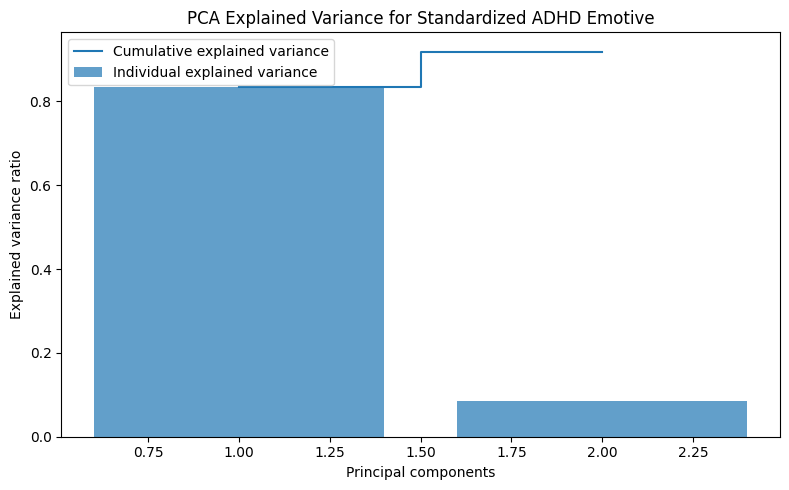

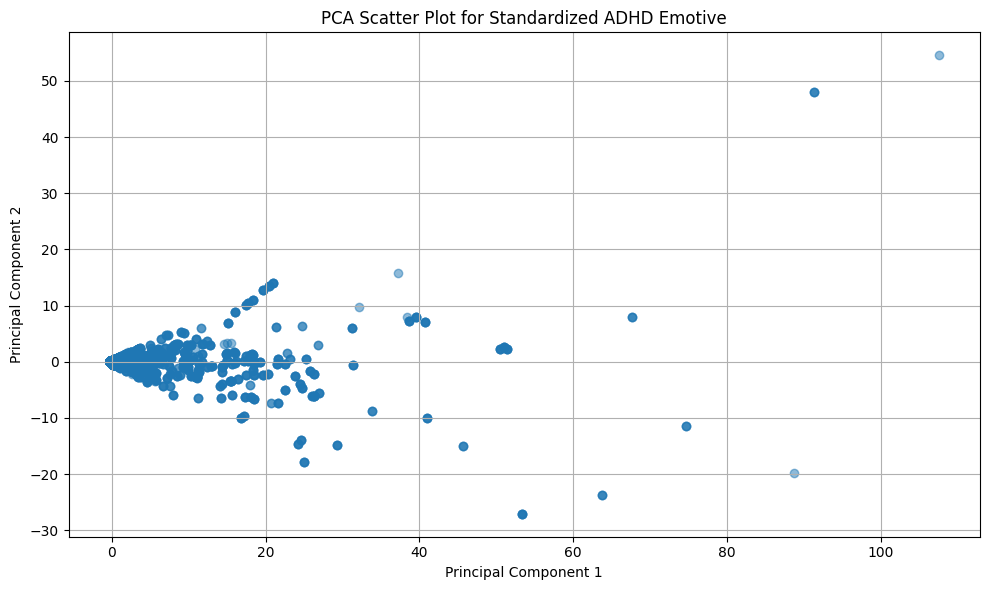

PCA Components:
[[ 0.44946875  0.43117566  0.46900121  0.45077812  0.43462898]
 [ 0.34091996  0.6294035   0.01797015 -0.43184603 -0.5484623 ]]


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


def apply_pca(data, n_components=2):
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(data)
    explained_variance = pca.explained_variance_ratio_
    components = pca.components_
    return principal_components, explained_variance, components


pc_adhd_emotive, explained_variance_adhd_emotive, pca_components = apply_pca(standardized_adhd_emotive)


def plot_pca_results(pc, explained_variance, components, title):
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center',
            label='Individual explained variance')
    plt.step(range(1, len(explained_variance) + 1), explained_variance.cumsum(), where='mid',
             label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.title(f'PCA Explained Variance for {title}')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(pc[:, 0], pc[:, 1], alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'PCA Scatter Plot for {title}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


    print("PCA Components:")
    print(components)

plot_pca_results(pc_adhd_emotive, explained_variance_adhd_emotive, pca_components, 'Standardized ADHD Emotive')
